In [13]:
import matplotlib.pyplot as plt
import numpy as np

Matplot is broken into axes and figures  
axis = drawing area with coordinate  
figures = one window or one image file

In [ ]:
fig = plt.figure()

Above it create a figure with axes set current figure. Can add more/different axes later  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  if __name__ == '__main__':


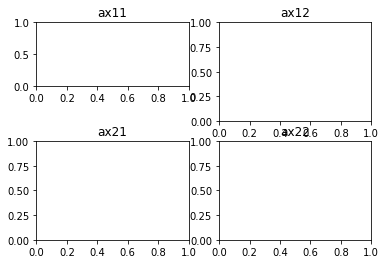

In [7]:
ax11 = plt.subplot(3,2,1)
ax12 = plt.subplot(2,2,2)
ax21 = plt.subplot(2,2,3)
ax22 = plt.subplot(2,2,4)
ax11.set_title("ax11")
ax12.set_title("ax12")
ax21.set_title("ax21")
ax22.set_title("ax22")
plt.tight_layout()
#plt.show()

Or we can use the below method

AxesSubplot(0.125,0.536818;0.352273x0.343182) AxesSubplot(0.125,0.125;0.352273x0.343182) AxesSubplot(0.547727,0.536818;0.352273x0.343182) AxesSubplot(0.547727,0.125;0.352273x0.343182)


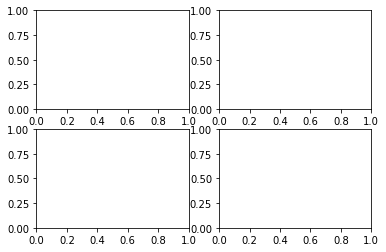

In [4]:
fig, axes  =  plt.subplots(2,2)
ax11,ax21,ax12,ax22 = axes.ravel()
print(ax11,ax12,ax21,ax22)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 3], c=y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


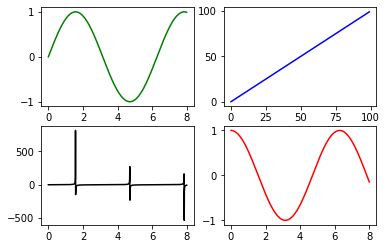

In [14]:
fig, ax = plt.subplots(2, 2)
x = np.linspace(0, 8, 1000)

ax[0, 0].plot(x, np.sin(x), 'g') #row=0, col=0
ax[1, 0].plot(x, np.tan(x), 'k') #row=1, col=0
ax[0, 1].plot(range(100), 'b') #row=0, col=1
ax[1, 1].plot(x, np.cos(x), 'r') #row=1, col=1
fig.show()

In [15]:
import pandas as pd

In [18]:
data = pd.read_csv("C:/Machine Learning/Hackathons/Sample Data/Regression/kc_house_data.csv")

In [19]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [25]:
data_orig = data.copy()
data.columns, data_orig.shape, data.shape

(Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'lat', 'long', 'sqft_living15', 'sqft_lot15'],
       dtype='object'), (21613, 21), (21613, 21))

In [32]:
data = data_orig.copy()
target = data["price"].copy()
data.drop(["id","date","price","zipcode"], inplace=True, axis =1)
data.shape

(21613, 17)

In [44]:
X = data.copy()
y = target.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

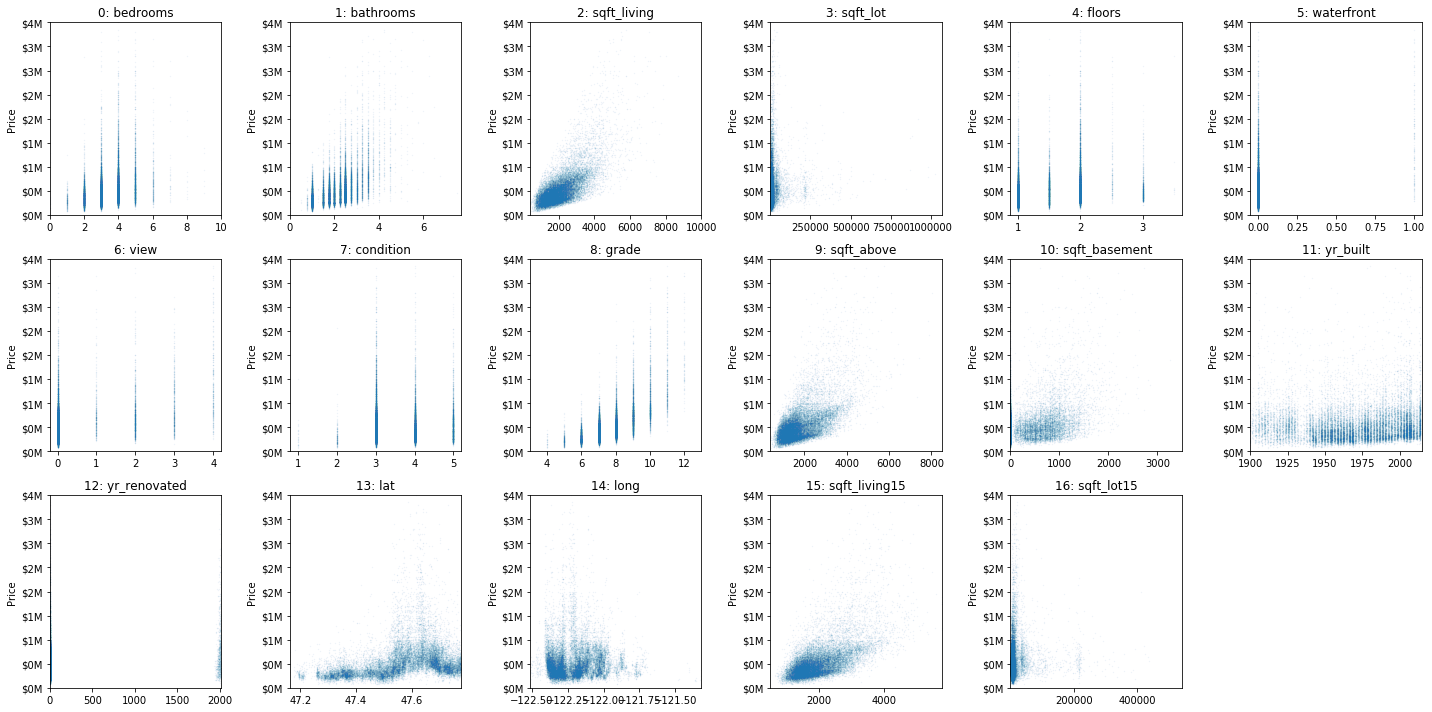

In [45]:
# FuncFormatter can be used as a decorator
import matplotlib.ticker as ticker

@ticker.FuncFormatter
def million_formatter(x, pos):
    return f"${int(x / 10 ** 6)}M"


fig, axes = plt.subplots(3, 6, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 16:
        ax.set_visible(False)
        continue
    X_col = X.iloc[:, i]
    ax.yaxis.set_major_formatter(million_formatter)
    # set ticks to disregard outliers
    ax.set_ylim(0, 4000000)
    if X_col.nunique() > 10:
        ax.set_xlim(X_col.quantile(q=.0001), X_col.quantile(q=.9999))
    ax.scatter(X_col, y, alpha=.1, s=.1)
    ax.set_title("{}: {}".format(i, X.columns[i]))
    ax.set_ylabel("Price")
plt.tight_layout()

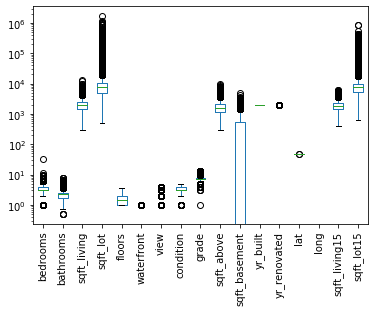

In [46]:
X.plot(kind='box', rot=90, logy=True)

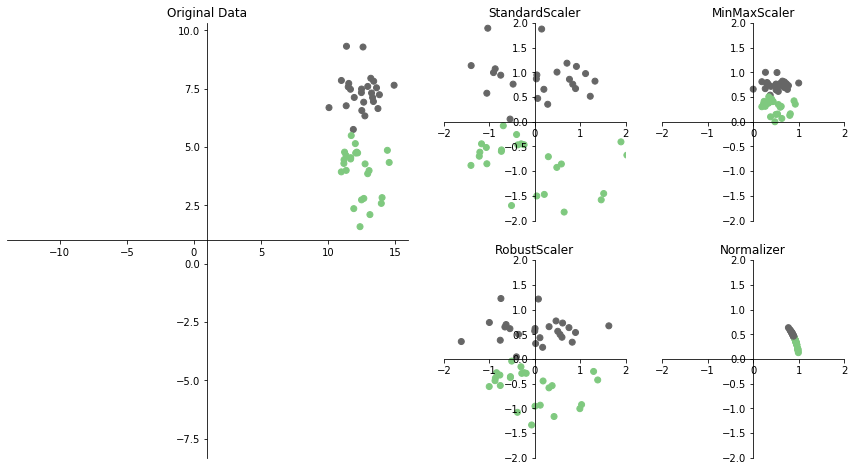

In [47]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3 

plt.figure(figsize=(15, 8))
main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()

main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("Original Data")
other_axes = [plt.subplot2grid((2, 4), (i, j))
              for j in range(2, 4) for i in range(2)]

for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                   MinMaxScaler(), Normalizer(norm='l2')]):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap="Accent")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__)

other_axes.append(main_ax)

for ax in other_axes:
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

In [54]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, f_regression
X, y = load_digits(return_X_y=True)
X_new = SelectKBest(f_regression, k=64).fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [55]:
X_new.pvalues_

array([           nan, 2.80027935e-02, 6.16072532e-01, 6.26461573e-01,
       1.86070680e-05, 1.34798351e-16, 3.09484901e-17, 1.76175618e-05,
       3.77894964e-01, 5.98210349e-01, 3.28573334e-07, 4.00915839e-08,
       7.21768007e-26, 1.11776850e-03, 2.66570717e-19, 5.95345032e-04,
       3.25127768e-01, 2.52953678e-01, 3.74331465e-05, 1.95063459e-09,
       8.48127390e-09, 1.31724579e-06, 8.15915864e-04, 2.69476909e-01,
       3.25672934e-01, 5.15889986e-13, 2.03540445e-03, 1.18011475e-32,
       8.34019105e-24, 1.94483749e-20, 5.15426854e-01, 7.31720065e-01,
                  nan, 9.19740729e-22, 7.56250570e-01, 1.86287992e-30,
       4.42150832e-12, 5.12826606e-12, 7.94373343e-01,            nan,
       6.56124086e-01, 4.60477590e-09, 1.78608452e-07, 7.88180306e-01,
       3.02512823e-01, 5.31978141e-01, 9.91357737e-03, 4.75176616e-02,
       6.17741215e-01, 9.74980882e-02, 1.14231625e-09, 1.05037054e-14,
       1.40152955e-66, 5.54486570e-16, 2.58275360e-01, 2.47114693e-05,
      